# Ham or Spam - Gerçek veya Spam

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [84]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [85]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
# or
df = df[['v1', 'v2']]

In [86]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df = df.rename(columns={"v1":"Class", "v2":"Text"})

In [88]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
import seaborn as sns

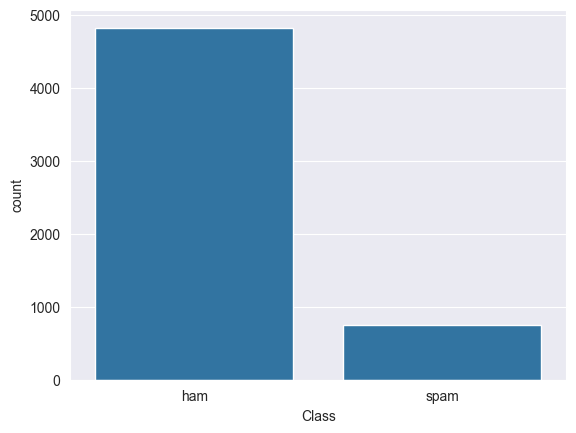

In [90]:
sns.countplot(x=df.Class);

In [91]:
df.Class.value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [92]:
df.Class = df.Class.map({ 'ham':0, 'spam':1 })

In [93]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Bir NLP projesine başlarken ilk yapılması gerekenler:

1- Herşeyi küçük harfe çevirme

2- Noktalama işaretlerini kaldırma

3- Rakamları kaldırma

4- Satırsonu, boşlukları kaldırma

5- Stopwords'leri kaldırma (gereksiz kelimeler) yani the, is, are, etc. ee, aa, vb.

6- Tokenization

7- Lemma & Stemma ile ekleri kaldır kökleri bul

8- Vektörleştirme (Word2Vec, TF-IDF, CountVectorizer) 

In [94]:
df.Text = df.Text.str.lower()

In [95]:
df.Text = df.Text.str.replace("[^\w\s]", "", regex=True)

In [96]:
df.Text = df.Text.str.replace("\d", "")

In [97]:
df.Text = df.Text.str.replace("\n", " ").replace("\r", "")

In [98]:
df.Text = df.Text.str.strip()

In [99]:
df.head()

,Class,Text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [100]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

DRY - Don't Repeat Yourself

In [101]:
def wc(data, bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open('php.jpeg'))
    wc = WordCloud(background_color = bgcolor, stopwords= STOPWORDS, mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [102]:
ham = df[df.Class == 0].Text
spam = df[df.Class == 1].Text

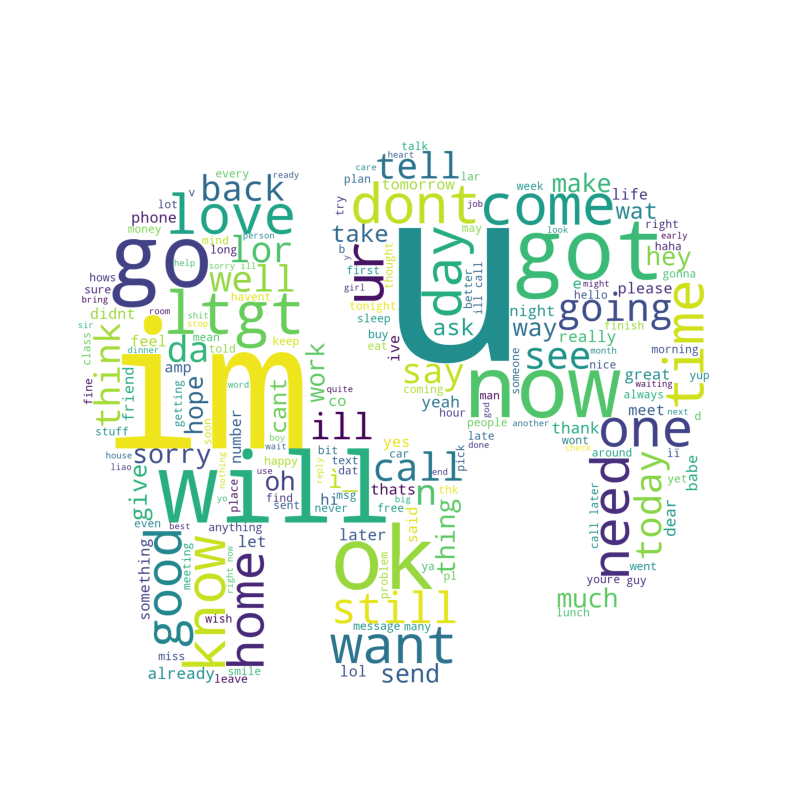

In [103]:
wc(ham, "white")

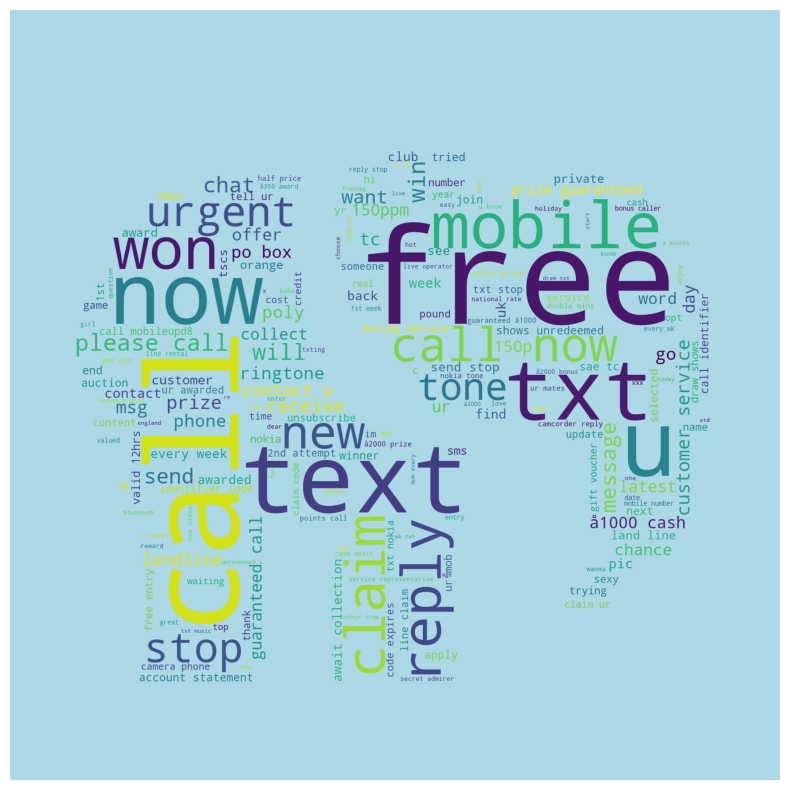

In [104]:
wc(spam, "lightblue")

In [105]:
x = df.Text
y = df.Class

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr = PorterStemmer()
def lemmafn (text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [109]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), analyzer=lemmafn)

In [110]:
x = vect.fit_transform(x)

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
model = MultinomialNB()

In [116]:
model.fit(x_train, y_train);

In [117]:
pred = model.predict(x_test)

In [119]:
accuracy_score(y_test, pred)

0.9811659192825112

In [124]:
pred, len(pred)

(array([1, 0, 1, ..., 0, 0, 1]), 1115)